Continuous injection scenario -> No additional component needed

In [1]:


import numpy as np

import astropy
from astropy import units as u

import gammapy

from collections import OrderedDict

import sys; sys.path.insert(0, '..')
from astropy import units
from gammapy.data import DataStore
from astropy.io import fits

from astropy.coordinates import SkyCoord
from gammapy.data import DataStore
from gammapy.maps import WcsGeom, MapAxis
from gammapy.data import FixedPointingInfo
from astropy.coordinates import SkyOffsetFrame
from gammapy.maps import WcsNDMap
from gammapy.makers import MapDatasetMaker
from gammapy.maps import WcsGeom, MapAxis
from gammapy.catalog import SourceCatalogHGPS
from importlib import reload
#reload(python_utils)
#reload(coordinates);

print('Astropy version:', astropy.__version__)
print('Gammapy version:', gammapy.__version__)

import sys
import pickle as pkl
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import csv
import astropy
from astropy.convolution import Tophat2DKernel
from astropy.coordinates import SkyCoord
from astropy.coordinates.angle_utilities import angular_separation
import astropy.units as u
from astropy.io import fits
from regions import CircleSkyRegion, RectangleSkyRegion
import gammapy
from gammapy.datasets import MapDataset, Datasets,FluxPointsDataset
from gammapy.estimators import FluxPointsEstimator, FluxPoints
from gammapy.maps import WcsGeom, MapAxis, Map, WcsNDMap
from gammapy.modeling import Fit,Parameter
from gammapy.modeling.models import (PointSpatialModel,PowerLawSpectralModel,
    GaussianSpatialModel,SkyModel,FoVBackgroundModel,SpectralModel,
    ExpCutoffPowerLawSpectralModel,Models,SpatialModel,
    TemplateSpectralModel,TemplateSpatialModel,ConstantSpatialModel,PowerLawNormSpectralModel,)
from regions import CircleSkyRegion
from gammapy.makers import MapDatasetMaker, SafeMaskMaker
from gammapy.data import Observation, DataStore
from gammapy.irf import load_cta_irfs, EDispKernel, PSFKernel
from gammapy.visualization.utils import plot_contour_line
from gammapy.estimators import ExcessMapEstimator
from gammapy.catalog import SourceCatalogHGPS
from gammapy.modeling.fit import Registry
from gammapy.modeling.covariance import Covariance
from gammapy.utils.scripts import make_name
import copy
from scipy.stats import norm
from scipy.integrate import quad
from itertools import combinations
import random

Astropy version: 5.2.1
Gammapy version: 0.1.dev19056+g5a5f803


In [2]:
from gammapy.datasets.map import MapDataset

<WCSAxesSubplot: >

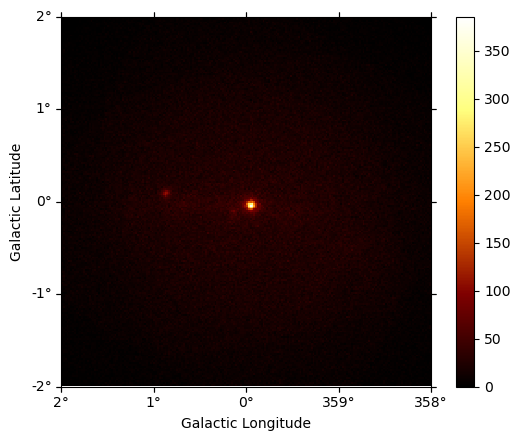

In [3]:


above_400GeV = True
cutoff_1747281 = True
i2 = True

nuisance = True

slow = False

dw=4

import importlib

h='hess1+2'
SD = 2
if SD==2:
    path = '/home/katrin/Documents/GC'
    fig_path = '/home/saturn/caph/mppi043h/gc/gammapy-0.18.2/impact/{}/3d_datasets/gc_dataset/tempo/'.format(h)
    hess1 = MapDataset.read('{}/dataset-bkg-fit-stacked_hess1+2_largerexclusion_hap1deg_hap1deg_v4.fits.gz'.format(path))

stacked = hess1
stacked = stacked.cutout(position=stacked.geoms["geom"].center_skydir, width=dw * u.deg)
geom= stacked.geoms["geom"]
geom_2d = geom.slice_by_idx(dict(energy=1))
ebins = stacked.geoms['geom'].axes['energy'].edges
min_energy=0

e_width,width=1,1
e_edges=ebins
e_edgesA=np.array(e_edges[e_edges>0.4*u.TeV]/u.TeV).tolist()
e_edgesB=np.array(e_edges/u.TeV).tolist()
e_edges2 = []
e_index2 = []
try:
    for i in range(int(len(e_edges)/e_width)):
        e_edges2.append(e_edgesA[-1-e_width*i])
        e_index2.append(e_edgesB.index(e_edgesA[-1-e_width*i]))
except:
    pass

if not e_width==1:
    e_edges2.append(e_edgesA[0])
    e_index2.append(e_edgesB.index(e_edgesA[0]))

e_edges2=e_edges2[::-1]*u.TeV
e_index2=e_index2[::-1]

dataset_fit = stacked
dataset_fit_bkgsys = dataset_fit.copy()
dataset_fit_bkgsys2 = dataset_fit.copy()

filename = f'{path}/hgps_catalog_v1.fits.gz'
cat = SourceCatalogHGPS(filename)

excl_regions = []
box_center = SkyCoord(l=0*u.deg, b=0*u.deg, frame='galactic')
box = RectangleSkyRegion(center=box_center, width=dw*u.deg, height=1.6*u.deg)
source_303 = CircleSkyRegion(center=SkyCoord(358.71, -0.64, unit='deg', frame='galactic'), radius=0.9*u.deg)
excl_regions = [box, source_303]
excl_mask_2d = Map.from_geom(geom_2d, data=geom_2d.region_mask(excl_regions, inside=False).data)

dataset_fit.counts.sum_over_axes().plot(add_cbar = 1)

In [4]:
print(dataset_fit.)

MapDataset
----------

  Name                            : XVCLihNy 

  Total counts                    : 558845 
  Total background counts         : 516858.47
  Total excess counts             : 41986.53

  Predicted counts                : 516858.47
  Predicted background counts     : 516858.47
  Predicted excess counts         : nan

  Exposure min                    : 4.73e+05 m2 s
  Exposure max                    : 2.70e+11 m2 s

  Number of total bins            : 960000 
  Number of fit bins              : 760000 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : nan

  Number of models                : 0 
  Number of parameters            : 0
  Number of free parameters       : 0




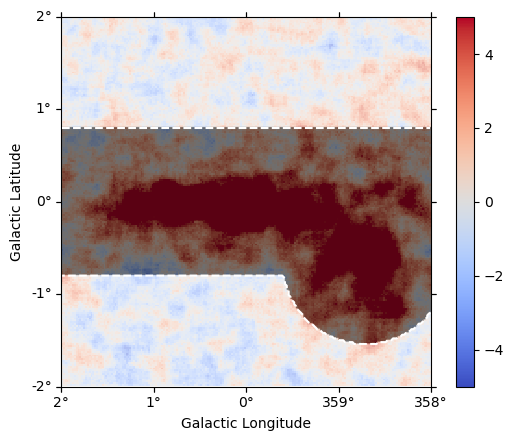

In [4]:
from  excess import ExcessMapEstimator
estimator = ExcessMapEstimator(
    correlation_radius="0.1 deg",
    selection_optional='all',
    energy_edges=[0.4, 100] * u.TeV,
)
result = estimator.run(dataset_fit)

result["sqrt_ts"].plot(cmap="coolwarm", add_cbar=True, vmin=-5, vmax=5)

source_303 = CircleSkyRegion(center=SkyCoord(358.71, -0.64, unit='deg', frame='galactic'), radius=0.9*u.deg)
source_248 = CircleSkyRegion(center=cat['HESS J1747-248'].position.galactic, radius=0.2*u.deg)
box = RectangleSkyRegion(center=box_center, width=10*u.deg, height=1.6*u.deg)
source_248 = CircleSkyRegion(center=SkyCoord(3.78, 1.72, unit='deg', frame='galactic'), radius=0.28*u.deg)

excl_regions = [box,source_303,source_248]
excl_mask_2d = Map.from_geom(geom_2d, data=geom_2d.region_mask(excl_regions, inside=False).data)
plt.contour(excl_mask_2d.data, levels=[0.5], colors='w', linestyles='--')
plt.imshow(excl_mask_2d.data,cmap='gray',alpha=0.5)
plt.show()

In [ ]:
#The order is always 0_1_2_3_4, (reference to iteration from HESS(2018))
#You also need to create the directory e.g. 0_1_2_3_4

#0 means only fit 1745-290,1747-281
#0c means cutoff on 1747-281
#0cg means cutoff on 1747-281 and 1745-290 has gaussian extension

#1 means fit plus diffuse
#2 means fit plus additional central component
#3 means fit plus foreground
#4 means fit plus 1741-302, 1746-285
#b means fit the nuisance parameters




DatasetModels

Component 0: SkyModel

  Name                      : 1745290
  Datasets names            : None
  Spectral model type       : ExpCutoffPowerLawSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    index                         :      2.140   +/-    0.02             
    amplitude                     :   2.55e-12   +/- 4.0e-14 1 / (cm2 s TeV)
    reference             (frozen):      1.000       TeV         
    lambda_                       :      0.093   +/-    0.02 1 / TeV     
    alpha                 (frozen):      1.000                   
    lon_0                         :    359.945   +/-    0.00 deg         
    lat_0                         :     -0.044   +/-    0.00 deg         

Component 1: SkyModel

  Name                      : 1747281
  Datasets names            : None
  Spectral model type       : PowerLawSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  

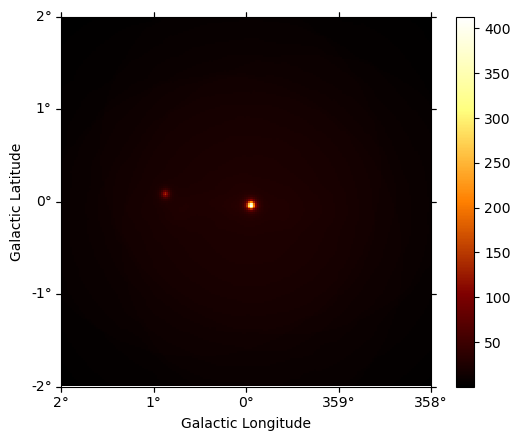

In [54]:
cat = SourceCatalogHGPS(filename)

source_model_1745290 = SkyModel(spatial_model=cat['HESS J1745-290'].spatial_model(), spectral_model=cat['HESS J1745-290'].spectral_model(), name="1745290")
source_model_1747281 = SkyModel(spatial_model=cat['HESS J1747-281'].spatial_model(), spectral_model=cat['HESS J1747-281'].spectral_model(), name="1747281")
source_model_1746285 = SkyModel(spatial_model=cat['HESS J1746-285'].spatial_model(), spectral_model=cat['HESS J1746-285'].spectral_model(), name="1746285")
source_model_1745303 = SkyModel(spatial_model=cat['HESS J1745-303'].spatial_model(), spectral_model=cat['HESS J1745-303'].spectral_model(), name="1745303")
source_model_1746308 = SkyModel(spatial_model=cat['HESS J1746-308'].spatial_model(), spectral_model=cat['HESS J1746-308'].spectral_model(), name="1746308")
source_model_1741302 = SkyModel(spatial_model=cat['HESS J1741-302'].spatial_model(), spectral_model=cat['HESS J1741-302'].spectral_model(), name="1741302")
source_model_cc = SkyModel(spatial_model=cat['HESS J1745-303'].spatial_model(), spectral_model=cat['HESS J1745-290'].spectral_model(), name="central component")
source_model_cc.spatial_model.position = cat['HESS J1745-290'].spatial_model().position
source_model_cc.spatial_model.sigma.value = 0.05


template_diffuse_map = Map.read(f'{path}/diffusetemplate.fits')
template_diffuse_map = Map.from_geom(template_diffuse_map.geom.rename_axes(['energy'], ['energy_true']),
                                    data = template_diffuse_map.data,
                                    unit = template_diffuse_map.unit)
template_diffuse = TemplateSpatialModel(template_diffuse_map, normalize=False)
diffuse_model = SkyModel(spectral_model=PowerLawNormSpectralModel(),
                         spatial_model=template_diffuse,name="diffuse")
M = Models([source_model_1745290,
            source_model_1747281,
            diffuse_model])

bkg = FoVBackgroundModel(dataset_name=dataset_fit.name)
M.append(bkg)

# exclude 303
skyregion_1745 = RectangleSkyRegion(center=cat['HESS J1745-303'].position.galactic, width=1*u.deg,height=1*u.deg)
dataset_fit.mask_safe.data[:] &= Map.from_geom(geom_2d, 
                                               data=geom_2d.region_mask([skyregion_1745], 
                                                                        inside=False).data).data   
thr = 0.4
ebins = dataset_fit.geoms['geom'].axes['energy'].edges
emask = ebins[:-1] >= thr*u.TeV
dataset_fit.mask_safe.data[~emask,:,:] = False
assert np.isfinite(dataset_fit.background.data[dataset_fit.mask_safe.data]).all()
dataset_fit.background.data[~dataset_fit.mask_safe.data] = 0.0


dataset_fit.models = M
dataset_fit.npred().sum_over_axes().plot(add_cbar = 1)

print(dataset_fit.models)

In [56]:
result = estimator.run(dataset_fit)


<WCSAxesSubplot: >

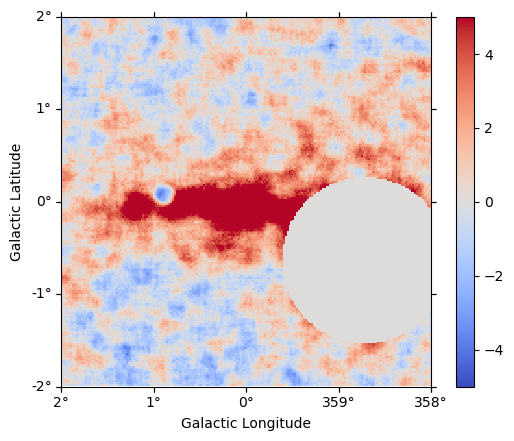

In [58]:
(result["sqrt_ts"].sum_over_axes(keepdims= False)* excl_mask_2d_fit
).plot(cmap="coolwarm", add_cbar=True, vmin=-5, vmax=5)

In [59]:
%%time
fit =  Fit()
result = fit.run(dataset_fit)

Position <SkyCoord (Galactic): (l, b) in deg
    (21.02789632, -0.04391105)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (21.02789632, -0.04391105)> is outside valid IRF map range, using nearest IRF defined within


CPU times: user 10.6 s, sys: 3.59 ms, total: 10.6 s
Wall time: 10.6 s


<WCSAxesSubplot: >

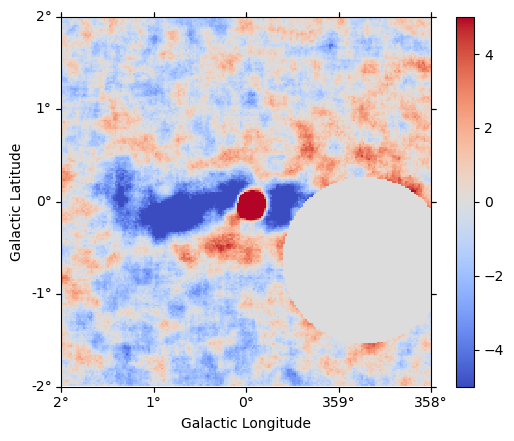

In [60]:
result = estimator.run(dataset_fit)
(result["sqrt_ts"].sum_over_axes(keepdims= False)* excl_mask_2d_fit
).plot(cmap="coolwarm", add_cbar=True, vmin=-5, vmax=5)

In [61]:
print(dataset_fit.models)

DatasetModels

Component 0: SkyModel

  Name                      : 1745290
  Datasets names            : None
  Spectral model type       : ExpCutoffPowerLawSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    index                         :      2.140   +/-    1.41             
    amplitude                     :   2.55e-12   +/- 1.4e-12 1 / (cm2 s TeV)
    reference             (frozen):      1.000       TeV         
    lambda_                       :      0.093   +/-    0.01 1 / TeV     
    alpha                 (frozen):      1.000                   
    lon_0                         :    359.945   +/-  141.42 deg         
    lat_0                         :     -0.044   +/-  127.28 deg         

Component 1: SkyModel

  Name                      : 1747281
  Datasets names            : None
  Spectral model type       : PowerLawSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  

(<WCSAxesSubplot: >,
 <AxesSubplot: xlabel='Energy [TeV]', ylabel='Residuals (data - model)'>)

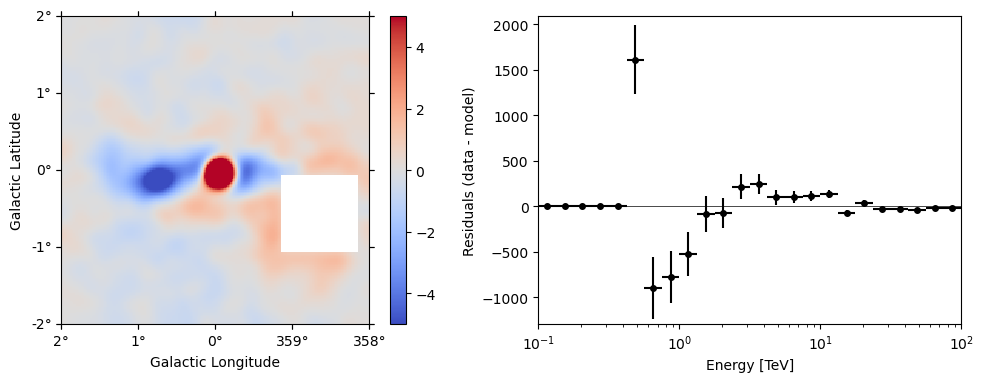

In [62]:
dataset_fit.plot_residuals()